In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
datafile = "qsar-biodeg.csv"
df = pd.read_csv(datafile, header = 0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,1
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,1
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,1
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,1


In [5]:
target_col = ['Class']
y = df[target_col]
X = df.drop(target_col, axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treinamento e 30% para teste

In [7]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8359621451104101


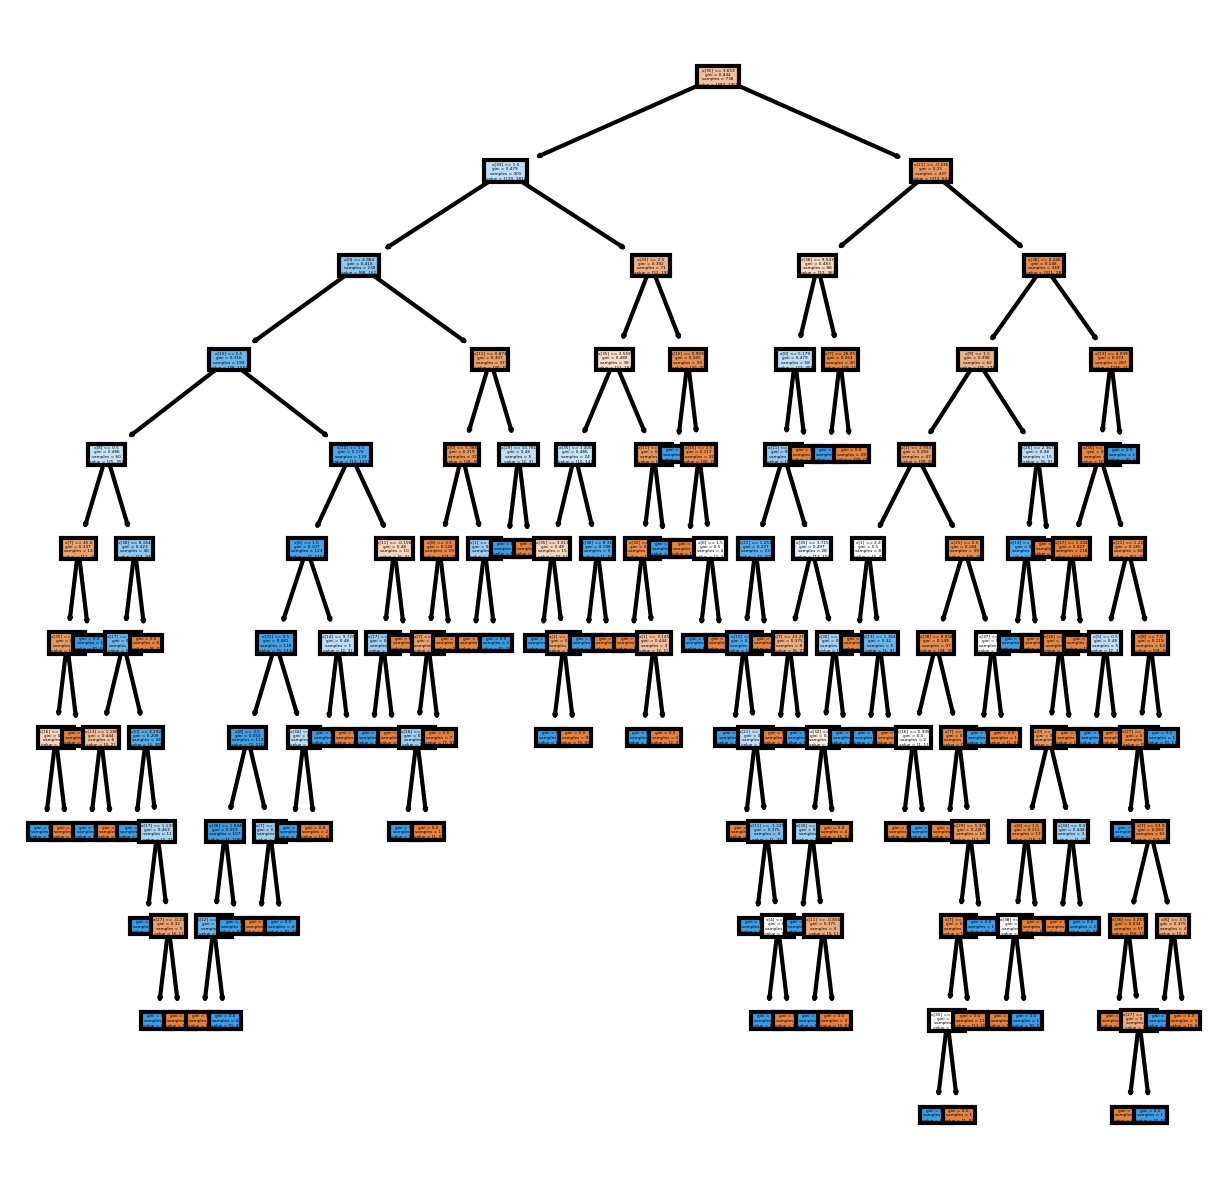

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf, filled=True)
plt.show()

In [11]:
clf = DecisionTreeClassifier(max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8296529968454258


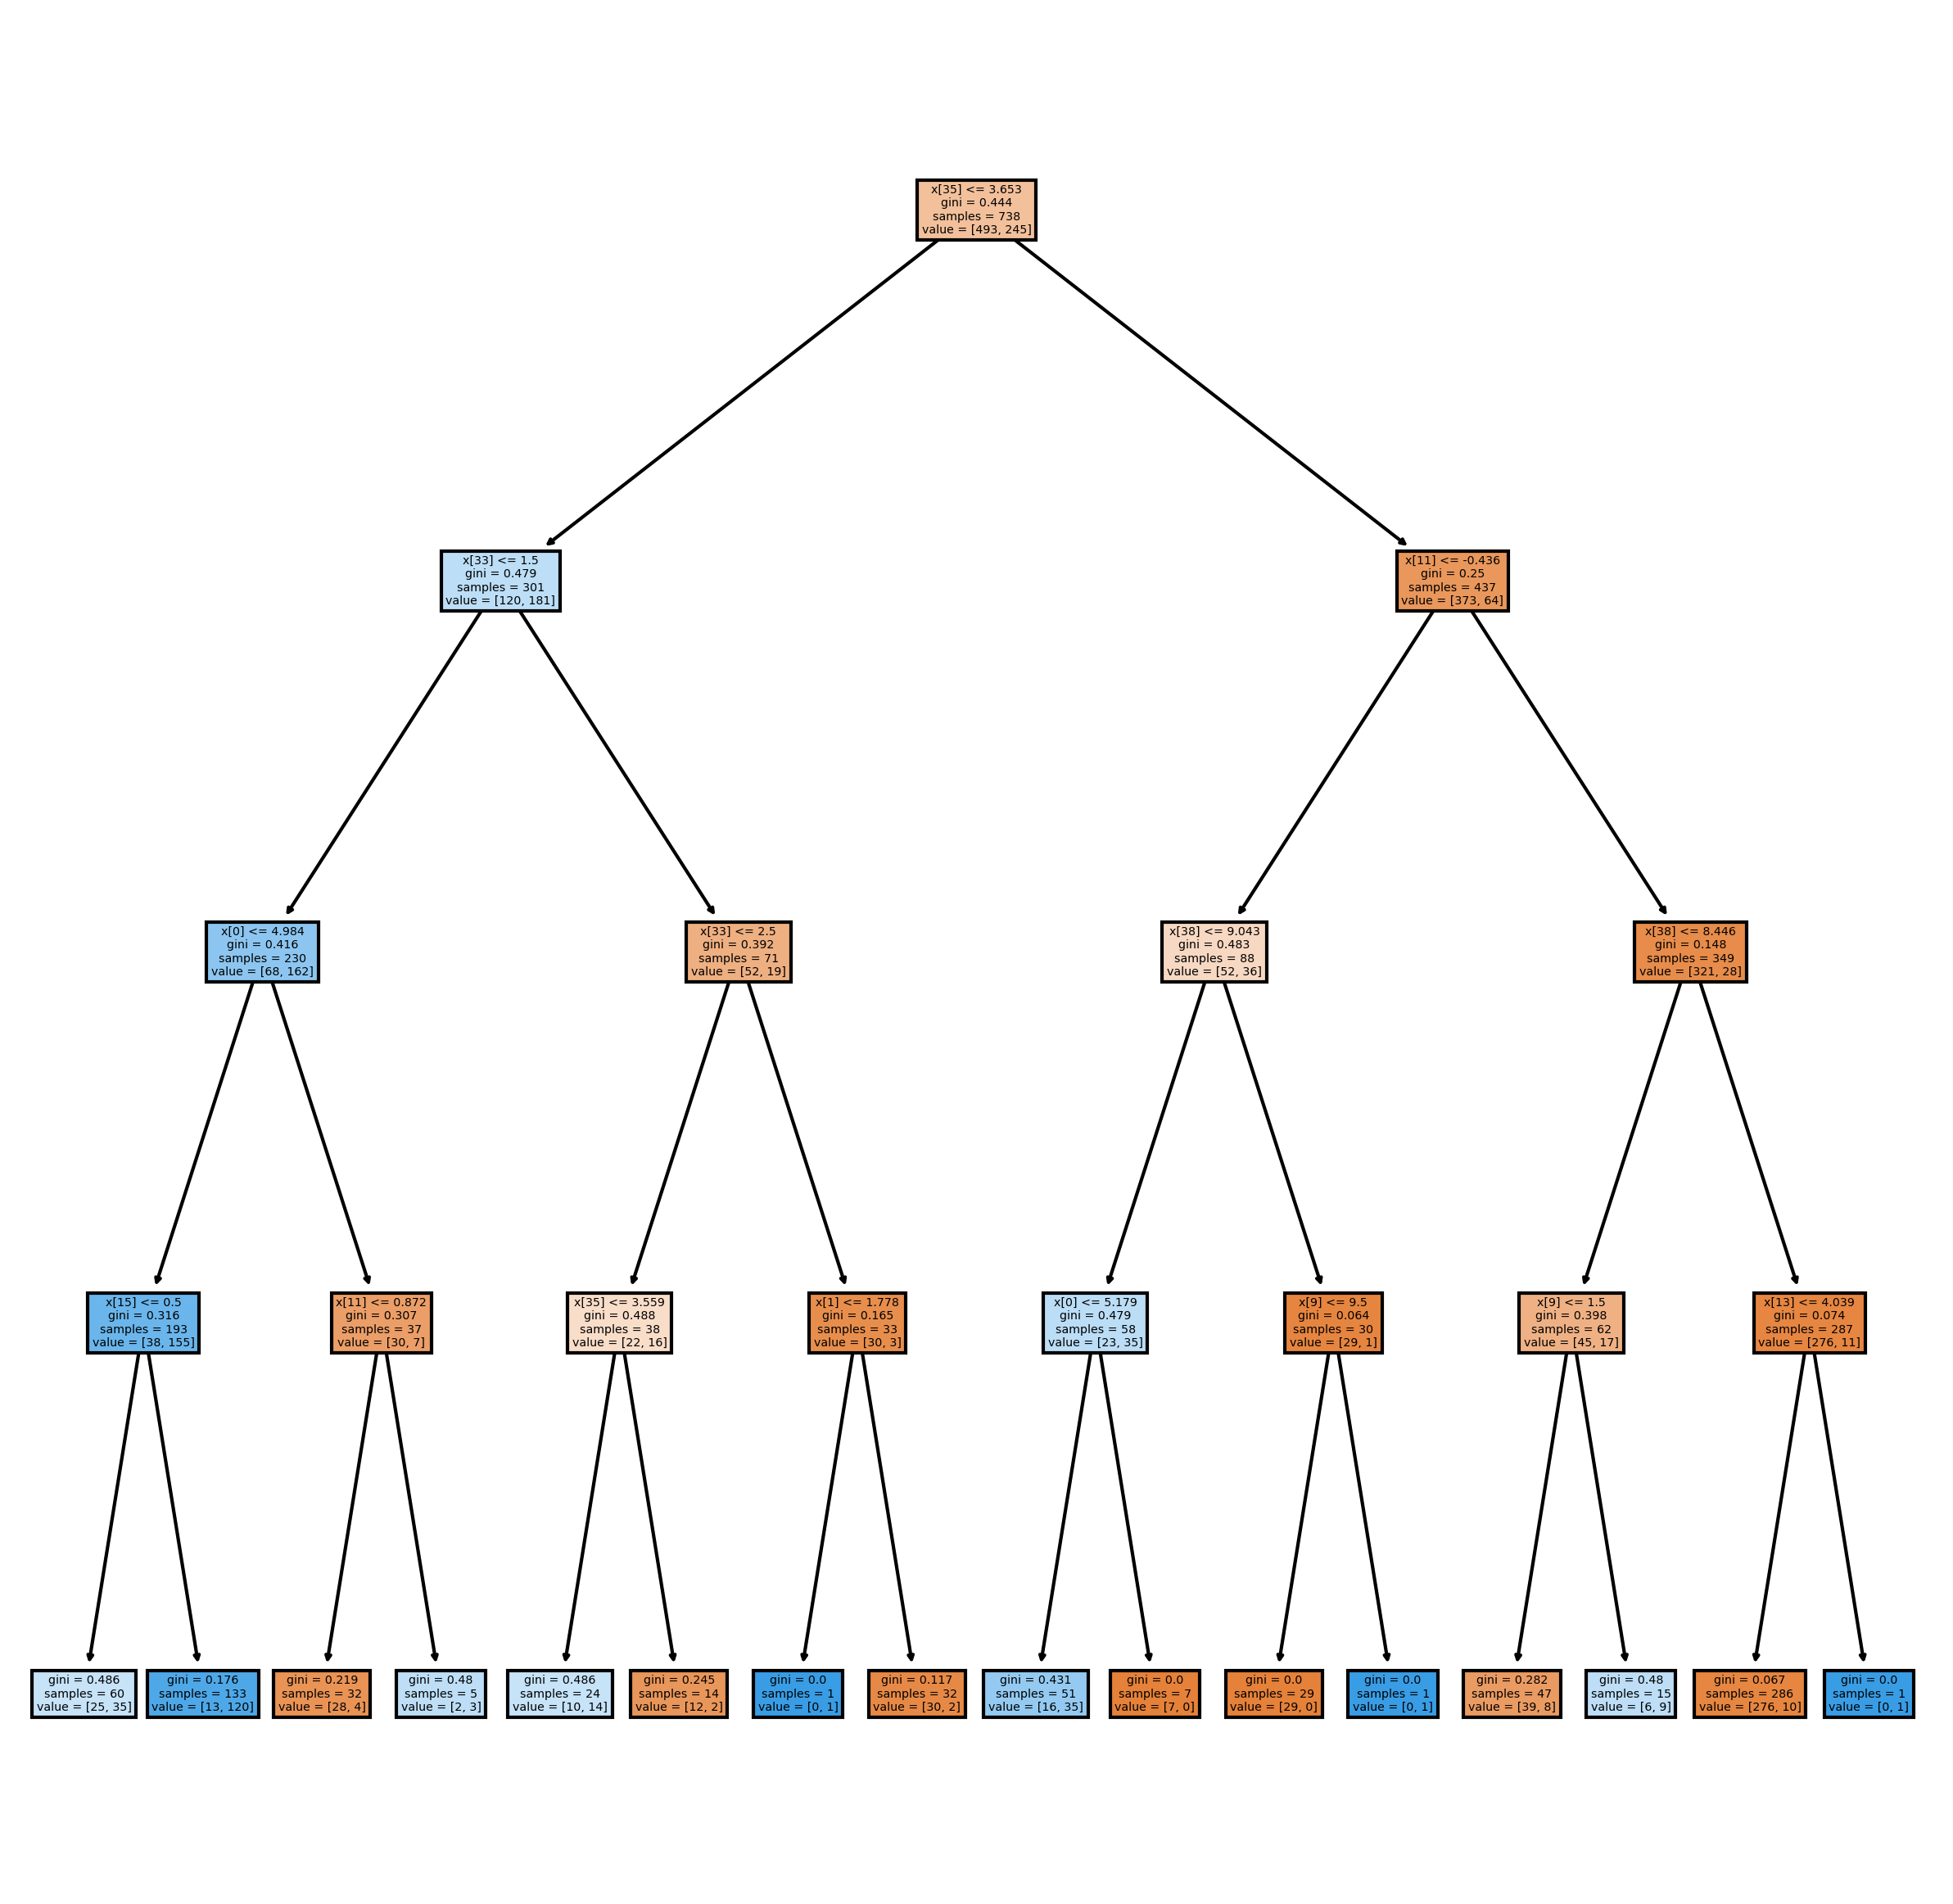

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf, filled=True)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
#Inicializa a classe RandomForest
rf = DecisionTreeClassifier()

#Elenca os hiperparâmetros a serem testados para a RandomForest
parameters = {
               'max_depth': (2, 5, 10, 20), 
               'criterion': ['gini', 'entropy'],
}

clf = GridSearchCV(rf, parameters, cv = 5)

#Ajusta o melhor modelo (melhores parâmetros aos dados de treinamento)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#Avalia a qualidade do modelo final
print(classification_report(y_test, y_pred)) 
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.84      0.90      0.87       206
           2       0.79      0.68      0.73       111

    accuracy                           0.83       317
   macro avg       0.82      0.79      0.80       317
weighted avg       0.82      0.83      0.82       317



0.8264984227129337

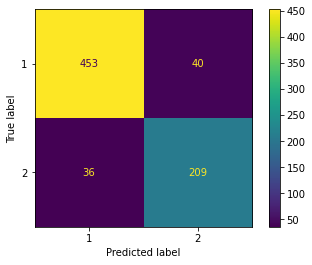

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)